In [2]:
import localgraphclustering as lgc
import matplotlib.pyplot as plt
import pandas as pd


datasets = 'facebook_pages'
if datasets == 'facebook_pages':
    input_path = '/home/ofrie.r/graph-ncp-project/datasets/facebook_pages/musae_facebook_no_self_loops.txt'
    output_path = '/home/ofrie.r/graph-ncp-project/results/lgc/facebook_pages/'
elif datasets == 'soc-LiveJournal1':
    input_path = '/home/ofrie.r/datasets/soc-LiveJournal1.txt'
    output_path = '../results/soc-LiveJournal1/'
elif datasets == 'facebook_combined': 
    input_path = '/home/ofrie.r/datasets/facebook_combined/facebook_combined.txt'
    output_path = '../results/facebook_combined/'
else: #TODO
    input_path = '/home/ofrie.r/datasets/facebook_pages/musae_facebook_edges.csv'
    output_path = '../results/facebook_pages/'


# # 1) load graph (GraphML, GML, or edgelist)
# if datasets == 'facebook_pages':
#     g = lgc.GraphLocal(input_path, file_type='edgelist', separator=',', header=True)   # or ('path/edges.txt','edgelist', sep=' ')
# else:
#     g = lgc.GraphLocal(input_path, file_type='edgelist', separator=' ')   # or ('path/edges.txt','edgelist', sep=' ')
g = lgc.GraphLocal(input_path, file_type='edgelist', separator=' ')   # or ('path/edges.txt','edgelist', sep=' ')


saves also the clusters

There are  1  connected components in the graph


approxPageRank:ncpapr_acl:    0.3 neighborhoods
approxPageRank:ncpapr_acl:   18.4 localmin rho=1.0e-05
approxPageRank:ncpapr_acl:   21.2 localmin rho=1.0e-04
approxPageRank:ncpapr_acl:  621.1 random_node rho=1.0e-05
approxPageRank:ncpapr_acl:  665.2 random_node rho=1.0e-04
approxPageRank:ncpapr_acl: 1331.7 random_neighborhood rho=1.0e-05
approxPageRank:ncpapr_acl: 1421.2 random_neighborhood rho=1.0e-04


/home/ofrie.r/miniconda3/envs/lgc_env/lib/python3.11/site-packages/localgraphclustering/ncpplots.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Wrote ncp_min_clusters_by_size.csv


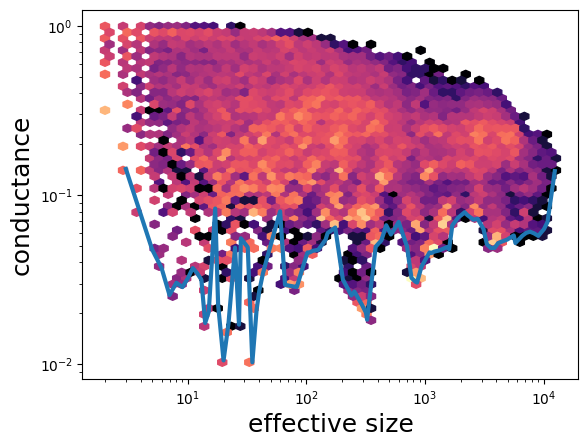

In [4]:
# create NCPData and keep clusters (memory heavy)
ncp_instance = lgc.NCPData(g, store_output_clusters=True)

# run approxPageRank (as before)
ncp_instance.approxPageRank(ratio=0.5, timeout=7200)

# plotting helper
ncp_plots = lgc.NCPPlots(ncp_instance)

# get min-curve for size (or cond_by_vol)
fig, ax, min_tuples = ncp_plots.cond_by_size(nbinsx=100)

# build dataframe with the cluster that produced each min point
df_all = ncp_instance.as_data_frame()   # contains "output_cluster" when store_output_clusters=True

rows = []
for x, phi, row_idx in min_tuples:
    row = df_all.loc[int(row_idx)]
    cluster = row.get("output_cluster", [])
    rows.append({
        "size": x,
        "conductance": phi,
        "row_index": int(row_idx),
        "cluster_size": len(cluster),
        # choose format you prefer; here semicolon-separated node ids
        "cluster_nodes": " ".join(map(str, cluster))
    })

pd.DataFrame(rows).to_csv(output_path + "ncp_min_clusters_by_size.csv", index=False)
print("Wrote ncp_min_clusters_by_size.csv")

plot the ncp (without saving to csv or saving clusters)

There are  1  connected components in the graph
Starting approxPageRank


/home/ofrie.r/miniconda3/envs/lgc_env/lib/python3.11/site-packages/localgraphclustering/GraphLocal.py:198: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



approxPageRank:ncpapr_acl:    0.3 neighborhoods
approxPageRank:ncpapr_acl:    2.3 localmin rho=1.0e-05
approxPageRank:ncpapr_acl:    2.6 localmin rho=1.0e-04
approxPageRank:ncpapr_acl:  257.0 random_node rho=1.0e-05
approxPageRank:ncpapr_acl:  267.4 random_node rho=1.0e-04
approxPageRank:ncpapr_acl:  676.7 random_neighborhood rho=1.0e-05
approxPageRank:ncpapr_acl:  795.9 random_neighborhood rho=1.0e-04
Finished approxPageRank


/home/ofrie.r/miniconda3/envs/lgc_env/lib/python3.11/site-packages/localgraphclustering/ncpplots.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



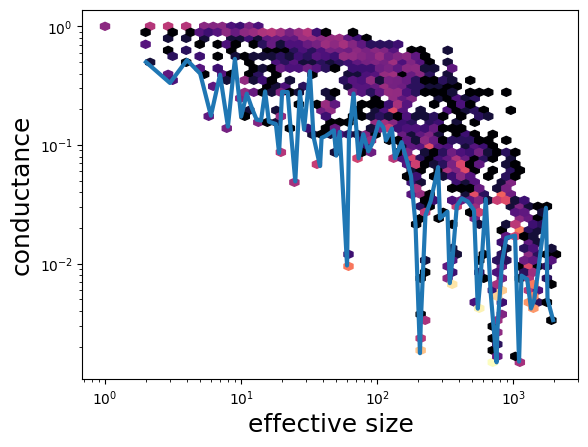

/home/ofrie.r/miniconda3/envs/lgc_env/lib/python3.11/site-packages/localgraphclustering/ncpplots.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



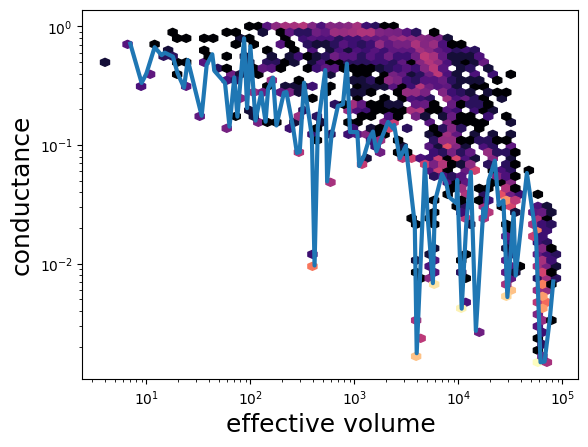

/home/ofrie.r/miniconda3/envs/lgc_env/lib/python3.11/site-packages/localgraphclustering/ncpplots.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



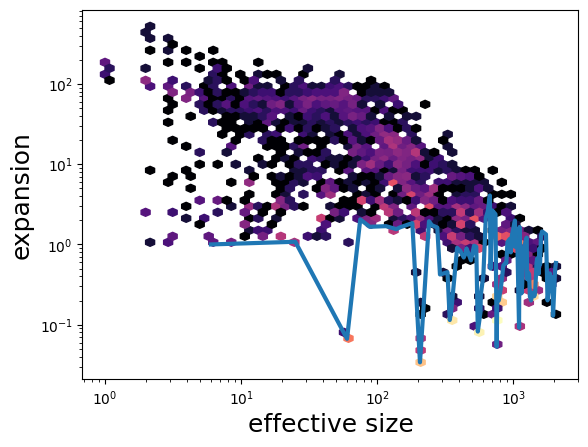

ValueError: too many values to unpack (expected 2)

In [22]:

# 1) load graph (GraphML, GML, or edgelist)
if datasets == 'facebook_pages':
    g = lgc.GraphLocal(input_path, file_type='edgelist', separator=',', header=True)   # or ('path/edges.txt','edgelist', sep=' ')
else:
    g = lgc.GraphLocal(input_path, file_type='edgelist', separator=' ')   # or ('path/edges.txt','edgelist', sep=' ')
# 2) create NCPData and run approxPageRank (ratio and timeout tune runtime / sweep granularity)
ncp_instance = lgc.NCPData(g)
print("Starting approxPageRank")
ncp_instance.approxPageRank(ratio=0.5, timeout=7200)   # increase timeout for large graphs
print("Finished approxPageRank")
# 3) plotting helpers
ncp_plots = lgc.NCPPlots(ncp_instance)#, method_name='acl')   # method_name used for legend/labels

# fig, ax, min_tuples = ncpplot.cond_by_size(nbinsx=100)

# df_min = pd.DataFrame(min_tuples, columns=["x", "y", "row_index"])
# df_min.to_csv("ncp_min_curve_size.csv", index=False)


# conductance vs size (returns fig, ax, min_tuples)
fig, ax, min_tuples = ncp_plots.cond_by_size()
plt.savefig(output_path + 'cond_by_size.png', bbox_inches='tight')
plt.show()

# conductance vs volume
fig, ax, min_tuples = ncp_plots.cond_by_vol()
plt.savefig(output_path + 'cond_by_volume.png', bbox_inches='tight')
plt.show()

# isoperimetry vs size
fig, ax, min_tuples = ncp_plots.isop_by_size()
plt.savefig(output_path + 'isoperimetry_by_size.png', bbox_inches='tight')
plt.show()

# optional: get numeric arrays from returned min_tuples (if you need them)
ks, phis = zip(*min_tuples)   # min_tuples expected as list of (size_or_volume, phi)

save to csv

/home/ofrie.r/miniconda3/envs/lgc_env/lib/python3.11/site-packages/localgraphclustering/ncpplots.py:31: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



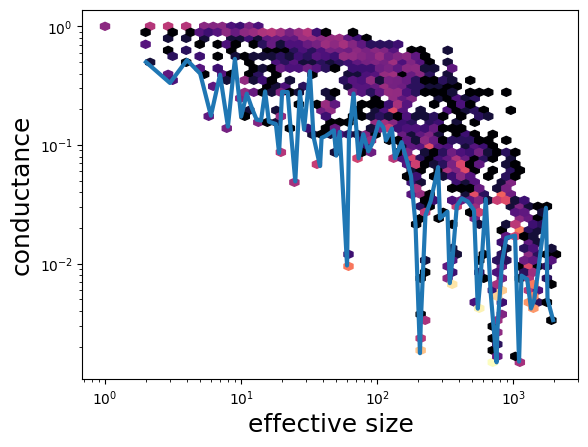

In [24]:

fig, ax, min_tuples = ncp_plots.cond_by_size(nbinsx=100)

df_min = pd.DataFrame(min_tuples, columns=["x", "y", "row_index"])
df_min.to_csv("ncp_min_curve_size.csv", index=False)
